<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Exercise 3** 

**NILESH VIJAYRANIA    ANKIT SRIVASTAVA**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import stats, ndimage, misc
import cv2

In [0]:
positive_names = ['p0'+str(i)+'.png' if i<10 else 'p'+str(i)+'.png' for i in np.arange(1,31)]
negative_names = ['n0'+str(i)+'.png' if i<10 else 'n'+str(i)+'.png' for i in np.arange(1,31)]

positive_ims = [np.array(Image.open(img)) for img in positive_names]
negative_ims = [np.array(Image.open(img)) for img in negative_names]

#positive_ims = [np.array(cv2.imread(img)) for img in positive_names]
#negative_ims = [np.array(cv2.imread(img)) for img in negative_names]

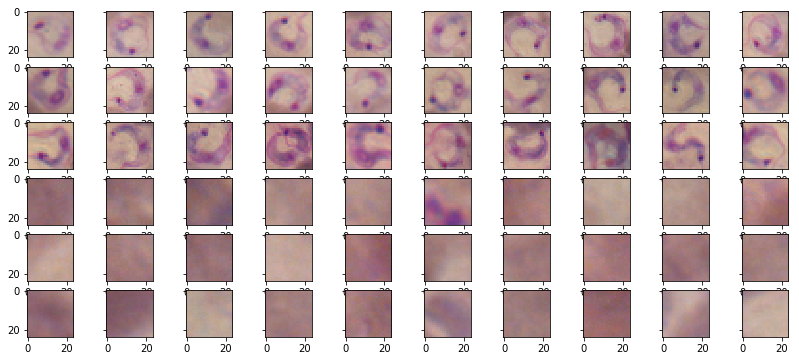

In [3]:
fig, ax = plt.subplots(6,10, figsize=(14, 6), sharey=True)
for i in range(len(positive_ims)):
  ax[int(i/10)][i%10].imshow(positive_ims[i])
for j in range(len(negative_ims)):
  counter = j + i + 1
  ax[int(counter/10)][counter%10].imshow(negative_ims[j])  
plt.show()


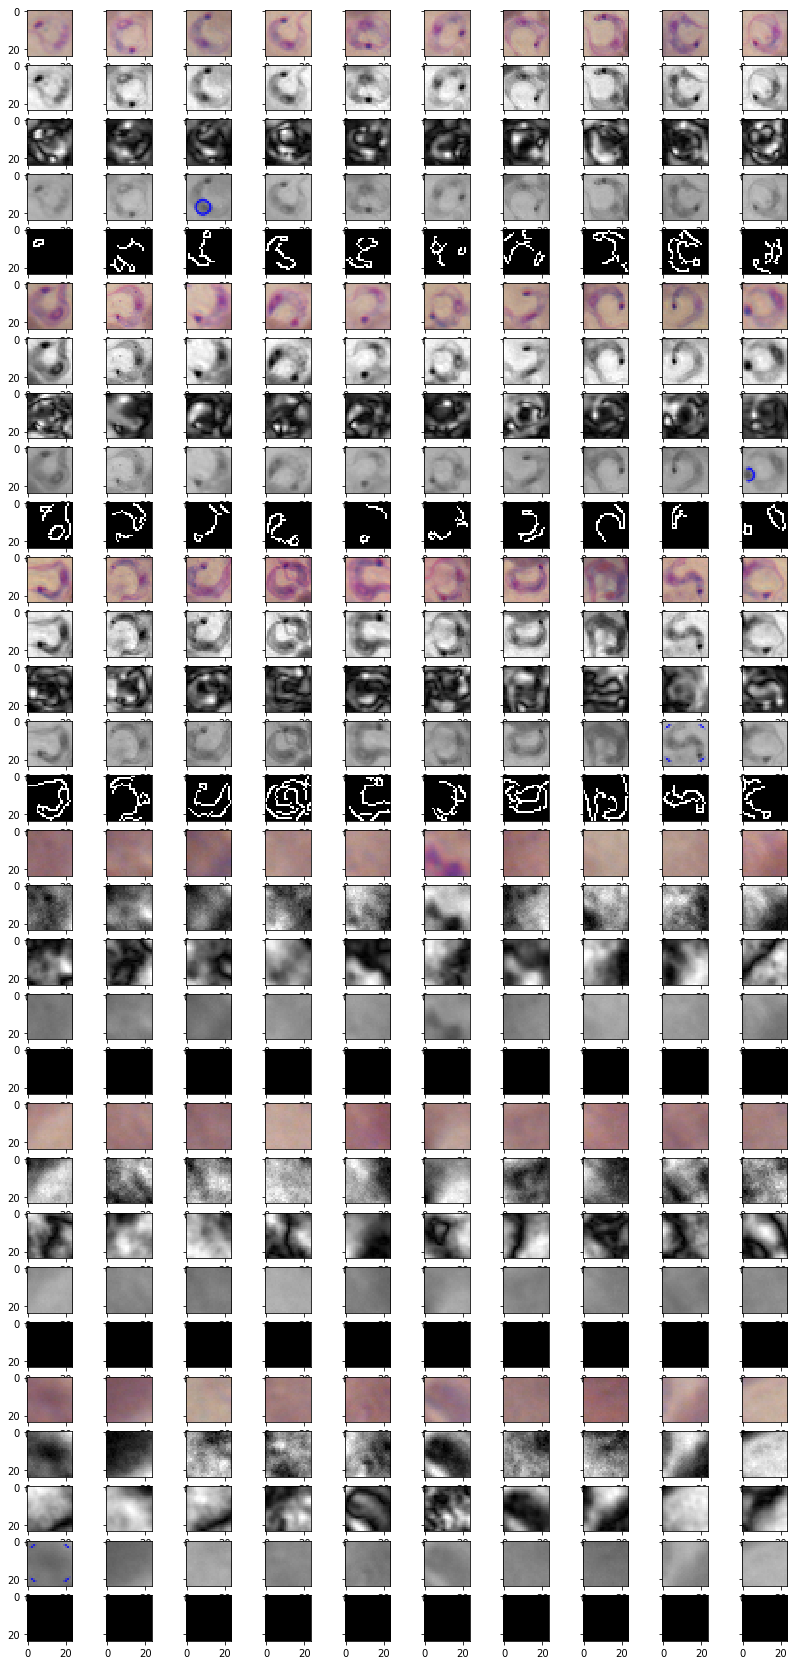

In [4]:
def get_grayscaleImage(img):
  gray =  np.dot(img, [299, 587, 114])/1000
  return gray.astype('int32')

def apply_sobel(grayscale_image):
  im = grayscale_image.astype('int32')
  dx = ndimage.sobel(im, 1)  # horizontal derivative
  dy = ndimage.sobel(im, 0)  # vertical derivative
  mag = np.hypot(dx, dy)  # magnitude
  return mag.astype('int32')

def get_binary_blob(im):
  im = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
  detector = cv2.SimpleBlobDetector_create()
  keypoints = detector.detect(im)
  im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  ret,thresh_img = cv2.threshold(im_with_keypoints,127,255,cv2.THRESH_BINARY)
  return im_with_keypoints

def get_canny_edge_detector(imgs):
  im = cv2.imread(imgs, cv2.IMREAD_GRAYSCALE)
  return cv2.Canny(im,100,200)

positive_blobs = [get_binary_blob(imageName) for imageName in positive_names]
negative_blobs = [get_binary_blob(imageName) for imageName in negative_names]

positive_edges = [get_canny_edge_detector(imageName) for imageName in positive_names]
negative_edges = [get_canny_edge_detector(imageName) for imageName in negative_names]

gray_positives = get_grayscaleImage(positive_ims)
sobel_positives = apply_sobel(gray_positives)

gray_negatives = get_grayscaleImage(negative_ims)
sobel_negatives = apply_sobel(gray_negatives)

fig, ax1 = plt.subplots(30,10, figsize=(14, 30), sharey=True)
for i in range(len(positive_ims)):
  ax1[int(i/10)*5][i%10].imshow(positive_ims[i])
  ax1[int(i/10)*5 + 1][i%10].imshow(gray_positives[i], cmap='gray')
  ax1[int(i/10)*5 + 2][i%10].imshow(sobel_positives[i], cmap='gray')
  ax1[int(i/10)*5 + 3][i%10].imshow(positive_blobs[i])
  ax1[int(i/10)*5 + 4][i%10].imshow(positive_edges[i],  cmap='gray')
for j in range(len(negative_ims)):
  counter = j + i + 1
  ax1[int(counter/10)*5][counter%10].imshow(negative_ims[j]) 
  ax1[int(counter/10)*5 + 1][counter%10].imshow(gray_negatives[j], cmap='gray')
  ax1[int(counter/10)*5 + 2][counter%10].imshow(sobel_negatives[j], cmap='gray')
  ax1[int(counter/10)*5 + 3][counter%10].imshow(negative_blobs[j])
  ax1[int(counter/10)*5 + 4][counter%10].imshow(negative_edges[j],  cmap='gray')
  

In [17]:
pos_mean = np.mean(positive_ims, axis=(0,1,2))
neg_mean = np.mean(negative_ims, axis=(0,1,2))

sobel_pos_mean = np.mean(sobel_positives)
sobel_neg_mean = np.mean(sobel_negatives)

edge_pos_mean = np.mean(positive_edges)
edge_neg_mean = np.mean(negative_edges)

#gray_pos_mean = np.mean(gray_positives)
#gray_neg_mean = np.mean(gray_negatives)


#print(np.max(gray_positives[1]), np.min(gray_positives[1]))
#print(np.max(sobel_positives[1]), np.min(sobel_positives[1]))
print(np.shape(pos_mean))
print(pos_mean)
print(np.shape(neg_mean))
print(neg_mean)
print(sobel_pos_mean)
print(sobel_neg_mean)

print(edge_pos_mean)
print(edge_neg_mean)


(3,)
[ 176.1725694444  139.5242476852  142.9174189815]
(3,)
[ 163.7130208333  126.8280092593  127.3414930556]
380.0199074074074
367.175
29.499131944444443
0.0


In [18]:
phi = len(positive_ims)/ (len(positive_ims) + len(negative_ims))
print('phi is ',phi)
#mu_0 = pos_mean
#mu_1 = neg_mean

mu_0 = np.append(pos_mean, np.var(positive_ims, axis=(0,1,2), dtype='float32'))
mu_1 = np.append(neg_mean, np.var(negative_ims, axis=(0,1,2), dtype='float32'))

#mu_0 = np.append(mu_0, [np.mean(positive_ims), np.var(positive_ims)])
#mu_1 = np.append(mu_1, [np.mean(negative_ims), np.var(negative_ims)])

#mu_0 = np.append(mu_0, gray_pos_mean)
#mu_1 = np.append(mu_1, gray_neg_mean)

mu_0 = np.append(mu_0, edge_pos_mean)
mu_1 = np.append(mu_1, edge_neg_mean)

#mu_0 = np.append(mu_0, sobel_pos_mean)
#mu_1 = np.append(mu_1, sobel_neg_mean)

print('mu_0 is ',mu_0)
print('mu_1 is ',mu_1)


def calc_sigma(data, edge_images, pos_mean):
  overall_avg = np.mean(data, axis=(1,2,3))
  overall_variance = np.var(data, axis=(1,2,3))
  channel_avg = np.mean(data, axis=(1,2))
  channel_variance = np.var(data, axis=(1,2))
  #sobel_avg = np.mean(apply_sobel(get_grayscaleImage(data)), axis=(1,2))
  #sobel_var = np.var(apply_sobel(get_grayscaleImage(data)), axis=(1,2))
  edge_avg = np.mean(edge_images, axis=(1,2))
  #data_temp = np.column_stack((channel_variance, sobel_avg))
  #data_temp = np.column_stack((channel_variance, sobel_avg, sobel_var))
  data_temp = np.column_stack((channel_variance, edge_avg))
  data_aug =np.append(channel_avg, data_temp, axis=1)
  temp_dot = np.dot((data_aug - pos_mean).T, data_aug - pos_mean)
  #print(np.shape(temp_dot))
  #print(temp_dot)
  return temp_dot

sigma = (1/(len(positive_ims) + len(negative_ims))) * (calc_sigma(positive_ims, positive_edges, mu_0) + calc_sigma(negative_ims, negative_edges, mu_1))
print(np.shape(sigma))
print(sigma)
print(np.linalg.det(sigma))

phi is  0.5
mu_0 is  [ 176.1725694444  139.5242476852  142.9174189815  512.2871704102
  766.6343383789  192.5259704590  29.4991319444]
mu_1 is  [ 163.7130208333  126.8280092593  127.3414930556  316.3630065918
  488.1467590332  266.5650024414  0.0000000000]
(7, 7)
[[ 172.5429983634  192.6663895620  139.3100622157 -160.1778566062
   218.8159525941 -59.5628325160 -23.1689228576]
 [ 192.6663895620  252.2665615171  170.4846205891 -458.9361372083
  -160.7910091413 -145.5878478282 -42.2946756496]
 [ 139.3100622157  170.4846205891  130.9607037914 -167.6287737585
   171.5465114163 -48.0159562559 -21.3942546829]
 [-160.1778566062 -458.9361372083 -167.6287737585  44211.4746134109
   63091.2443434959  27720.6322319549  566.2283614234]
 [ 218.8159525941 -160.7910091413  171.5465114163  63091.2443434959
   101126.7519767570  44134.7586904570  551.6092258466]
 [-59.5628325160 -145.5878478282 -48.0159562559  27720.6322319549
   44134.7586904570  23489.5115979653  114.3290522596]
 [-23.1689228576 -42.2

In [0]:
def calculateGDA(x, mu_0, mu_1, sigma):
  n = len(mu_0) if len(mu_0) else 1 
  
  sigma_deter = np.linalg.det(sigma)
  #print(sigma_deter)
  multiplier_coff = 1/(np.power(2*np.pi, n/2)* np.power(sigma_deter,0.5))
  #print(multiplier_coff)
  #print(np.linalg.inv(sigma))
  expo_temp_0 = np.dot(np.linalg.inv(sigma),x - mu_0)
  expo_temp_1 = np.dot(np.linalg.inv(sigma),x - mu_1)
  expo_0 = np.dot((x - mu_0).T, expo_temp_0)
  expo_1 = np.dot((x - mu_1).T, expo_temp_1)
  #print('expo_0 is ', expo_0)
  #print('expo_0 is ', np.exp(-1/2 * expo_0))
  return [multiplier_coff*np.exp(-1/2 * expo_0), multiplier_coff*np.exp(-1/2 * expo_1)]
  
                     

In [23]:
np.set_printoptions(formatter={'float': '{: 0.10f}'.format})

def calc_prob(img, img_edge):
  #d = np.mean(img)
  #d = np.mean(img, axis=(0,1))
  #d = np.append(np.mean(img, axis=(0,1)), [np.mean(img), np.var(img)])
  d = np.append(np.mean(img, axis=(0,1)), np.var(img, axis=(0,1)))
  #d = np.append(d, np.mean(apply_sobel(get_grayscaleImage(img))))
  #d = np.append(d, np.var(apply_sobel(get_grayscaleImage(img))))
  d = np.append(d, np.mean(img_edge))
  #print(d)
  return calculateGDA(d, mu_0, mu_1, sigma)
#np.shape(np.mean(positive_ims[0], axis=(0,1)))
pos_probs = [calc_prob(positive_ims[i], positive_edges[i]) for i in range(30)]
#print(filter(pos_probs, lambda x: x[0] < x[1]))
print('<-----------------------  POSITIVES  -------------------------->')
print(np.array(pos_probs) * 100000000000000000)
print('<-----------------------  NEGATIVES  -------------------------->')
neg_probs = [calc_prob(negative_ims[i], negative_edges[i]) for i in range(30)]
print(np.array(neg_probs) * 100000000000000000)



<-----------------------  POSITIVES  -------------------------->
[[ 531.3652485268  83.5541233972]
 [ 2081.7745368407  0.4350782381]
 [ 3927.6958402496  1.5106872686]
 [ 29824.6726982914  0.1403051793]
 [ 18367.6570432629  1.8618818760]
 [ 14692.6392135649  16.3789155855]
 [ 20913.6074700691  0.2885113571]
 [ 236.6561912137  0.0000754062]
 [ 152.8075290180  0.0000000190]
 [ 4601.0626806383  0.0126673289]
 [ 6947.6494091298  0.0381178562]
 [ 1865.9401512121  0.0063694855]
 [ 198.3619612227  0.0000884996]
 [ 257.5478366474  0.0034739779]
 [ 2203.0811552609  56.6653101765]
 [ 7226.2319640627  1.9858356656]
 [ 4883.2027805067  0.1856834717]
 [ 3335.8300430001  0.4147884469]
 [ 142.4842806953  5.4255036939]
 [ 30852.9246086581  1.2803440016]
 [ 4.7672618966  0.0000000002]
 [ 11022.8350433709  0.0010318204]
 [ 11921.4913962332  0.0005717075]
 [ 0.8468954720  0.0000000000]
 [ 74.2640481126  0.0000024502]
 [ 2812.0255647518  11.0308023180]
 [ 843.9826592280  0.0000011913]
 [ 6.5738539793  0.00

In [24]:
print('<------------------positive stats--------------->')
pos_probs_test = [np.append(x, ind + 1) for ind,x in enumerate(pos_probs)]
l_0 = list(filter(lambda x: x[0] <= x[1], pos_probs_test))
print(np.array(l_0))
print('<------------------negative stats--------------->')
neg_probs_test = [np.append(x, ind + 1) for ind,x in enumerate(neg_probs)]
l_1 = list(filter(lambda x: x[0] >= x[1], neg_probs_test))
print(np.array(l_1))

<------------------positive stats--------------->
[]
<------------------negative stats--------------->
[]


# REPORT

We are using following 6 features and appy GDA for classification task
Mean of color in each channel(R,G,B)
Variance of color in each Channel(R,G,B).

Based of the learned feature, the model is able to correctly classifying all the images except one negative example(number 6 )

In [0]:

#t = get_grayscaleImage(positive_ims)
#test = get_binary_blob('p01.png')
#test = get_binary_blob(gray_positives[0])

plt.imshow(test[0], cmap='gray')
#ax[0][1].imshow(im, cmap='gray')


